# LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
# num_words = 1000 : 빈도가 1~1000인 단어만 선택
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000,
                                                        test_split=0.2)

C:\Users\has91\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\has91\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## 뉴스 기사 보기

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

# 딥러닝 구조 만들기

In [6]:
# 데이터 전처리
# maxlen = 100 단어 수를 100개로 맞추라는 뜻
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

model = Sequential()
# Embedding('불러온 단어의 총 개수', '기사당 단어 수')
model.add(Embedding(1000, 100))
# LSTM9기사당 단어 수, 기타 옵션)의 형식
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                   validation_data = (x_test, y_test))

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 8s 88ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 7s 79ms/step - loss: 2.0343 - accuracy: 0.4905 - val_loss: 1.9434 - val_accuracy: 0.4911
Epoch 3/20
90/90 [==============================] - 7s 81ms/step - loss: 1.8457 - accuracy: 0.5239 - val_loss: 1.7790 - val_accuracy: 0.5557
Epoch 4/20
90/90 [==============================] - 8s 90ms/step - loss: 1.7606 - accuracy: 0.5459 - val_loss: 1.7379 - val_accuracy: 0.5583
Epoch 5/20
90/90 [==============================] - 9s 104ms/step - loss: 1.6541 - accuracy: 0.5726 - val_loss: 1.6544 - val_accuracy: 0.5721
Epoch 6/20
90/90 [==============================] - 9s 95ms/step - loss: 1.6734 - accuracy: 0.5667 - val_loss: 1.6574 - val_accuracy: 0.5980
Epoch 7/20
90/90 [==============================] - 8s 90ms/step - loss: 1.5549 - accuracy: 0.6091 - val_loss: 1.5688 - val_accuracy: 0.6135
Epoch 8/20
9

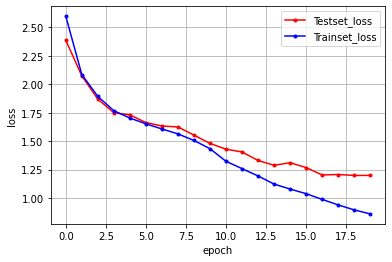

In [12]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [13]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [14]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리 maxlen=100 단어 수를 100개로 맞추고 나머지는 0개로
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17465344/17464789 [==============================] - 2s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',
                strides=1)) #Conv1D : 1차원으로 옮긴 것
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일 
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, 
                    epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test)[1]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

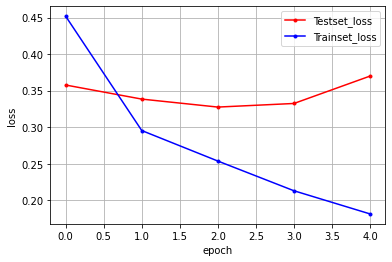

In [21]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()